### Ridge Regression
A Ridge regressor is basically a regularized version of Linear Regressor. i.e to the original cost function of linear regressor we add a regularized term which forces the learning algorithm to fit the data and helps to keep the weights lower as possible. The regularized term has the parameter ‘alpha’ which controls the regularization of the model i.e helps in reducing the variance of the estimates.
Cost Function for Ridge Regressor.

In [32]:
from sklearn.linear_model import Ridge

In [33]:
ridge_reg = Ridge(alpha = 1, solver = "cholesky")

In [34]:
import numpy as np
m = 100
X = 6 * np.random.rand(m, 1)-3
#print(X)
Y = 0.5 * X ** 2 + X + 2 + np.random.rand(m, 1)
ridge_reg.fit(X, Y)
print(ridge_reg.intercept_, ridge_reg.coef_)
print(ridge_reg.predict([[1.5]]))

[3.97267095] [[0.90646089]]
[[5.33236229]]


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

In [36]:
boston = load_boston()
boston_df = pd.DataFrame(boston['data'], columns = boston['feature_names'])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [37]:
boston_df['Price'] = boston['target']
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [38]:
new_X = boston_df.drop('Price', axis = 1) # check without giving axis
new_X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [39]:
new_Y = boston_df['Price']
new_Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Price, Length: 506, dtype: float64

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(new_X, new_Y, test_size = 0.3, random_state = 3)

In [41]:
print(len(X_test), len(X_train), len(Y_test), len(Y_train))

152 354 152 354


In [42]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
rr = Ridge(alpha = 0.01)

In [44]:
rr.fit(X_train, Y_train)
train_score = lr.score(X_train, Y_train)
train_score

0.7419034960343789

In [45]:
test_score = lr.score(X_test, Y_test)
test_score

0.7147895265576849

In [46]:
train_score_rr = rr.score(X_train, Y_train)
train_score_rr

0.7419030253527293

In [47]:
test_score_rr = rr.score(X_test, Y_test)
test_score_rr

0.7146125373123909

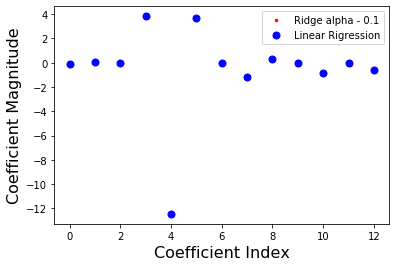

In [48]:
plt.plot(rr.coef_, linestyle = 'none', marker = '.', markersize = 5, color ='red', label = 'Ridge alpha - 0.1')
plt.plot(lr.coef_, linestyle = 'none', marker = 'o', markersize = 7, color ='blue', label = 'Linear Rigression')
plt.xlabel('Coefficient Index', fontsize = 16)
plt.ylabel('Coefficient Magnitude', fontsize = 16)
plt.legend()
plt.show()

In [49]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X, Y)
lasso_reg.predict([[1.5]])

array([5.28811095])

Lasso regression is a regression analysis method that performs both variable selection and regularization. Lasso regression uses soft thresholding. Lasso regression selects only a subset of the provided covariates for use in the final model.

In [50]:
from sklearn.linear_model import Lasso
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [51]:
cancer_df = pd.DataFrame(cancer['data'], columns = cancer['feature_names'])
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [52]:
X = cancer['data']
Y = cancer['target']

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 31)

In [54]:
lasso_reg = Lasso()
lasso_reg.fit(X_train, Y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [55]:
train_score = lasso_reg.score(X_train, Y_train)
test_score = lasso_reg.score(X_test, Y_test)
print(train_score)
print(test_score)

0.5600974529893079
0.5832244618818156


In [56]:
coeff_used = np.sum(lasso_reg.coef_ != 0)
print(coeff_used)

4


In [57]:
print("training score", train_score)
print("test score", test_score)
print("number of features used: ", coeff_used)

training score 0.5600974529893079
test score 0.5832244618818156
number of features used:  4


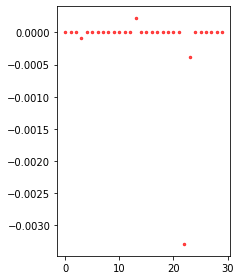

In [58]:
import matplotlib.pyplot as plt
plt.xlabel("Coeffiecient Index", fontsize = 16)
plt.ylabel("Coeffiecint Magnitude", fontsize = 16)
plt.subplot(122)
plt.plot(lasso_reg.coef_, alpha = 0.7, linestyle = 'none', marker = '.', markersize = 5, color = 'red')
plt.tight_layout()
plt.show()

In [60]:
from sklearn.linear_model import ElasticNet
m = 100
X = 6 * np.random.rand(m, 1)-3
#print(X)
Y = 0.5 * X ** 2 + X + 2 + np.random.rand(m, 1)
elastic_net = ElasticNet(alpha = 0.1, l1_ratio = 0.5)
elastic_net.fit(X, Y)
elastic_net.predict([[1.5]])

array([5.08185662])